In [108]:
# import modules
import pandas as pd
import numpy as np

from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

# nice time series plots
from sktime.utils.plotting import plot_series

In [109]:
# import training data for weekly time series
train = pd.read_csv("../../../Data/M3/monthly-m3.csv")

In [110]:
# store ids for Weekly time series in Micro category
# category = "MICRO       "
# train = train.loc[train.Category == category,]
series_ids = train.iloc[:,0]
series_ids = list(series_ids)

In [111]:
# convert to a list of series, potentially with different lengths
full_data = [x.dropna() for _, x in train.iloc[:,6:].iterrows()]

In [112]:
Test = [x.iloc[-18:] for x in full_data]
Test = pd.DataFrame([x.reset_index(drop=True) for x in Test]).T

***

In [131]:
# import forecasts from original competition
m3_fcasts = pd.read_csv("../../../Data/M3/M3Forecast_TES.csv", header=None)

In [132]:
m3_fcasts

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,N 1,6,5406.43,5875.96,6345.48,6815.00,7284.53,7754.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N 2,6,4142.60,4055.47,3968.34,3881.21,3794.09,3706.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N 3,6,3535.47,3546.07,3556.67,3567.28,3577.88,3588.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N 4,6,4971.59,5311.33,5651.06,5990.79,6330.52,6670.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N 5,6,5346.03,5272.95,5199.87,5126.79,5053.70,4980.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2998,N2999,8,1537.88,1510.76,1483.63,1456.50,1429.37,1402.24,1375.12,1347.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2999,N3000,8,1571.31,1508.65,1445.99,1383.32,1320.66,1257.99,1195.33,1132.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3000,N3001,8,7587.39,7122.96,6658.52,6194.09,5729.66,5265.22,4800.79,4336.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3001,N3002,8,10962.53,10804.12,10645.70,10487.28,10328.87,10170.45,10012.04,9853.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
series_ids = train.iloc[:,0]
series_ids = list(series_ids)

In [140]:
select_series = [i in series_ids for i in m3_fcasts.iloc[:,0]]

In [142]:
m3_fcasts.loc[select_series,:]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1401,N1402,18,5122.22,5490.72,5859.22,6227.73,6596.23,6964.73,7333.23,7701.74,8070.24,8438.74,8807.25,9175.75,9544.25,9912.75,10281.26,10649.76,11018.26,11386.76
1402,N1403,18,1181.27,1174.82,1168.37,1161.93,1155.48,1149.03,1142.59,1136.14,1129.70,1123.25,1116.80,1110.36,1103.91,1097.46,1091.02,1084.57,1078.13,1071.68
1403,N1404,18,5985.76,6060.03,6134.31,6208.58,6282.86,6357.13,6431.40,6505.68,6579.95,6654.23,6728.50,6802.77,6877.05,6951.32,7025.60,7099.87,7174.14,7248.42
1404,N1405,18,5504.14,5593.23,5682.32,5771.40,5860.49,5949.58,6038.66,6127.75,6216.84,6305.92,6395.01,6484.10,6573.18,6662.27,6751.36,6840.44,6929.53,7018.62
1405,N1406,18,9079.24,9192.15,9305.06,9417.98,9530.89,9643.81,9756.72,9869.64,9982.55,10095.47,10208.38,10321.29,10434.21,10547.12,10660.04,10772.95,10885.87,10998.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824,N2825,18,2632.81,2634.37,2635.93,2637.49,2639.05,2640.61,2642.16,2643.72,2645.28,2646.84,2648.40,2649.96,2651.52,2653.08,2654.64,2656.20,2657.75,2659.31
2825,N2826,18,2393.01,2342.13,2291.25,2240.37,2189.49,2138.61,2087.73,2036.85,1985.97,1935.09,1884.21,1833.33,1782.45,1731.57,1680.69,1629.81,1578.93,1528.05
2826,N2827,18,2482.20,2450.97,2419.75,2388.53,2357.30,2326.08,2294.86,2263.63,2232.41,2201.19,2169.96,2138.74,2107.51,2076.29,2045.07,2013.84,1982.62,1951.40
2827,N2828,18,2864.42,2858.02,2851.62,2845.22,2838.82,2832.42,2826.02,2819.62,2813.22,2806.82,2800.42,2794.02,2787.62,2781.22,2774.82,2768.42,2762.02,2755.62


In [ ]:
fcasts = m3_fcasts.loc[select_series,2:].T

In [ ]:
    # store ids for Weekly time series in Micro category
    # category = "MICRO       "
    # series_ids = train_data.loc[train_data.Category == category,].iloc[:,0]
    
    
    # select the forecasts for the desired series
    select_series = [i in series_ids for i in m3_fcasts.iloc[:,0]]
    
    # remove id and horizon columns and transpose so columns = series
    
    # fcasts = m3_fcasts.loc[:,2:].T
    
    # choose the horizon
    fcasts = fcasts.iloc[:h,:]

***

In [114]:
def obtain_forecasts(file_name, h, train_data):
    
    # import forecasts from original competition
    m3_fcasts = pd.read_csv(file_name, header=None)
    
    # store ids for Weekly time series in Micro category
    # category = "MICRO       "
    # series_ids = train_data.loc[train_data.Category == category,].iloc[:,0]
    series_ids = train_data.iloc[:,0]
    series_ids = list(series_ids)
    
    # select the forecasts for the desired series
    select_series = [i in series_ids for i in m3_fcasts.iloc[:,0]]
    
    # remove id and horizon columns and transpose so columns = series
    fcasts = m3_fcasts.loc[select_series,2:].T
    # fcasts = m3_fcasts.loc[:,2:].T
    
    # choose the horizon
    fcasts = fcasts.iloc[:h,:]
    
    return fcasts

In [186]:
fcasts = obtain_forecasts(file_name="../../../Data/M3/M3Forecast_AutoANN.csv", h=18, train_data=train)

In [187]:
# fcasts = pd.DataFrame(fcasts.iloc[1,:]).T

In [188]:
t1 = pd.DataFrame(Test.iloc[:18,:])

In [189]:
t1

,0,1,2,3,4,5,6,7,8,9,...,1418,1419,1420,1421,1422,1423,1424,1425,1426,1427
0,2280.0,1440.0,6540.0,7420.0,7350.0,450.0,2100.0,3000.0,2820.0,4380.0,...,2951.5,4302.0,5066.4,3368.8,5433.8,2641.5,2421.1,2520.5,2870.8,1494.9
1,480.0,840.0,4920.0,4260.0,6500.0,2400.0,3300.0,3000.0,5620.0,5080.0,...,2998.2,4263.8,5000.6,3338.1,5414.7,2658.5,2358.6,2531.1,2870.8,1477.9
2,5040.0,1440.0,1710.0,2740.0,2700.0,3000.0,5550.0,2550.0,3380.0,4740.0,...,2960.0,4259.5,4790.4,3298.4,5410.4,2630.9,2307.0,2480.1,2875.1,1448.2
3,1920.0,1560.0,3420.0,3200.0,8700.0,1650.0,4800.0,2250.0,1480.0,3800.0,...,2930.3,4238.3,4773.4,3273.4,5387.1,2601.2,2310.4,2473.8,2877.2,1418.4
4,840.0,1080.0,5910.0,7140.0,9250.0,1950.0,3600.0,3900.0,2320.0,5060.0,...,2879.3,4172.5,4680.0,3253.5,5361.6,2565.1,2316.6,2431.3,2881.5,1414.2
5,2520.0,360.0,6720.0,6960.0,10250.0,750.0,5100.0,4200.0,3320.0,4260.0,...,2849.6,4098.2,4480.4,3224.0,5340.4,2592.7,2239.4,2420.7,2873.0,1401.4
6,1560.0,960.0,4650.0,5760.0,9550.0,3150.0,3000.0,2550.0,4380.0,4540.0,...,2790.1,4100.3,4454.9,3210.3,5346.7,2571.4,2229.8,2390.9,2849.6,1390.8
7,1440.0,1320.0,2550.0,2280.0,6450.0,2700.0,2850.0,1350.0,2200.0,2900.0,...,2754.0,4074.8,4414.5,3184.8,5348.8,2609.7,2175.8,2333.6,2849.6,1378.1
8,240.0,1080.0,8640.0,12300.0,9800.0,6150.0,5250.0,7950.0,3540.0,4500.0,...,2692.5,4074.8,4418.8,3147.3,5346.7,2613.9,2154.8,2269.9,2832.6,1361.1
9,1800.0,1680.0,7680.0,8800.0,12450.0,1500.0,1800.0,1950.0,2480.0,3540.0,...,2628.8,4064.2,4370.0,3209.2,5348.8,2607.5,2134.9,2244.4,2819.9,1331.4


In [190]:
mean_absolute_percentage_error(t1, fcasts, symmetric=True)

C:\Users\Cameron\anaconda3\lib\site-packages\sktime\performance_metrics\forecasting\_functions.py:1545: FutureWarning: In the percentage error metric functions the default argument symmetric=True is changing to symmetric=False in v0.12.0.
  warn(


0.15034374350456273

In [99]:
def make_plot(fcasts, test, train):
    fcasts.index = np.arange(len(train)+1, len(train)+len(fcasts)+1)
    test.index = np.arange(len(train)+1, len(train)+len(fcasts)+1)
    train.index = np.arange(0, len(train))
    
    return plot_series(train, test, fcasts, labels = ["Train", "Test", "Forecasts"])

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='464'>)

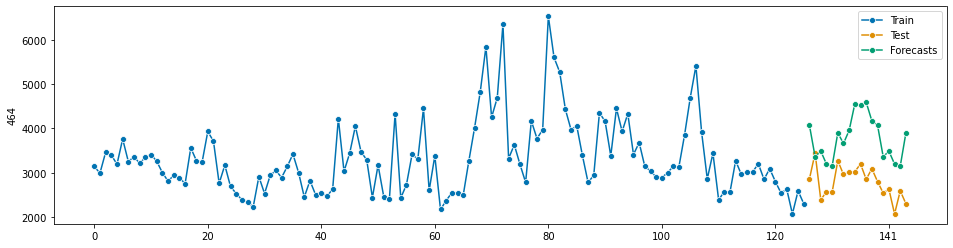

In [106]:
make_plot(fcasts.iloc[:,464], t1.iloc[:,464], full_data[464])